<a href="https://colab.research.google.com/github/Gmahajan189/Project-5/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Experience Analysis**

In [ ]:
data = pd.read_excel('/content/telcom_data.xlsx')

In [ ]:
data.isnull().sum()

,0
Bearer Id,0
Start,1
Start ms,1
End,1
End ms,1
Dur. (ms),1
IMSI,570
MSISDN/Number,1066
IMEI,572
Last Location Name,1153


In [ ]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = []
numeric_cols = []
# Loop through each column in categorical_cols and apply LabelEncoder
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])
# Fill missing values only in numeric columns
numeric_cols = data.select_dtypes(include=['number']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())


In [ ]:
data.isnull().sum()

,0
Bearer Id,0
Start,1
Start ms,0
End,1
End ms,0
Dur. (ms),0
IMSI,0
MSISDN/Number,0
IMEI,0
Last Location Name,1153


In [ ]:
# Fill missing values with mean (for numeric) and mode (for categorical)
data['TCP DL Retrans. Vol (Bytes)'].fillna(data['TCP DL Retrans. Vol (Bytes)'].mean(), inplace=True)
data['Avg RTT DL (ms)'].fillna(data['Avg RTT DL (ms)'].mean(), inplace=True)
data['Avg Bearer TP DL (kbps)'].fillna(data['Avg Bearer TP DL (kbps)'].mean(), inplace=True)
data['Handset Type'].fillna(data['Handset Type'].mode()[0], inplace=True)

# Aggregating per customer (MSISDN/Number)
user_experience = data.groupby('MSISDN/Number').agg({
    'TCP DL Retrans. Vol (Bytes)': 'mean',
    'Avg RTT DL (ms)': 'mean',
    'Avg Bearer TP DL (kbps)': 'mean',
    'Handset Type': 'first'
}).reset_index()

user_experience.columns = ['MSISDN', 'Avg TCP Retransmission', 'Avg RTT', 'Avg Throughput', 'Handset Type']
print(user_experience.head())


         MSISDN  Avg TCP Retransmission     Avg RTT  Avg Throughput  \
0  3.360100e+10            2.080991e+07   46.000000            37.0   
1  3.360100e+10            2.080991e+07   30.000000            48.0   
2  3.360100e+10            2.080991e+07  109.795706            48.0   
3  3.360101e+10            1.066000e+03   69.000000           204.0   
4  3.360101e+10            1.507977e+07   57.000000         20197.5   

                     Handset Type  
0  Huawei P20 Lite Huawei Nova 3E  
1          Apple iPhone 7 (A1778)  
2                       undefined  
3         Apple iPhone 5S (A1457)  
4         Apple iPhone Se (A1723)  


In [ ]:
# Finding top 10, bottom 10, and most frequent TCP, RTT, and Throughput
top_tcp = user_experience.nlargest(10, 'Avg TCP Retransmission')
bottom_tcp = user_experience.nsmallest(10, 'Avg TCP Retransmission')
most_frequent_tcp = user_experience['Avg TCP Retransmission'].mode()

top_rtt = user_experience.nlargest(10, 'Avg RTT')
bottom_rtt = user_experience.nsmallest(10, 'Avg RTT')
most_frequent_rtt = user_experience['Avg RTT'].mode()

top_throughput = user_experience.nlargest(10, 'Avg Throughput')
bottom_throughput = user_experience.nsmallest(10, 'Avg Throughput')
most_frequent_throughput = user_experience['Avg Throughput'].mode()

print("Top 10 TCP Retransmission:\n", top_tcp)
print("Bottom 10 RTT:\n", bottom_rtt)


Top 10 TCP Retransmission:
              MSISDN  Avg TCP Retransmission  Avg RTT  Avg Throughput  \
85785  3.369858e+10            4.289488e+09    244.0         26456.0   
32273  3.365871e+10            4.288060e+09     62.0         80994.0   
58026  3.366491e+10            4.268432e+09    305.0         52901.0   
31942  3.365863e+10            4.254644e+09     61.0         87516.0   
62049  3.366613e+10            4.211189e+09    178.0         57104.0   
70079  3.366877e+10            4.166591e+09    149.0         70272.0   
43629  3.366131e+10            4.131046e+09     35.0         94139.0   
48341  3.366240e+10            4.117753e+09     42.0         61286.0   
64113  3.366682e+10            3.968072e+09     93.0         35609.0   
98211  3.376264e+10            3.785295e+09     50.0         45244.0   

           Handset Type  
85785  Huawei B528S-23A  
32273  Huawei B528S-23A  
58026  Huawei B528S-23A  
31942  Huawei B528S-23A  
62049  Huawei B528S-23A  
70079  Huawei B528S-23A

<ipython-input-10-8a79c0f8b79b>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=throughput_dist.index, y=throughput_dist.values, palette='viridis')


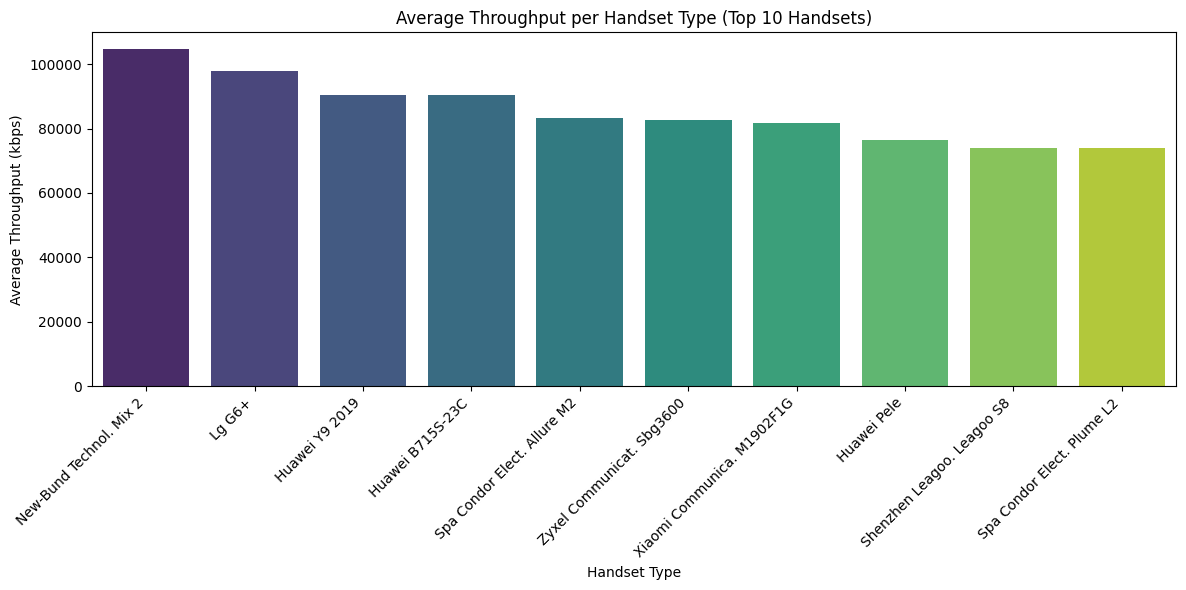

<ipython-input-10-8a79c0f8b79b>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tcp_dist.index, y=tcp_dist.values, palette='coolwarm')


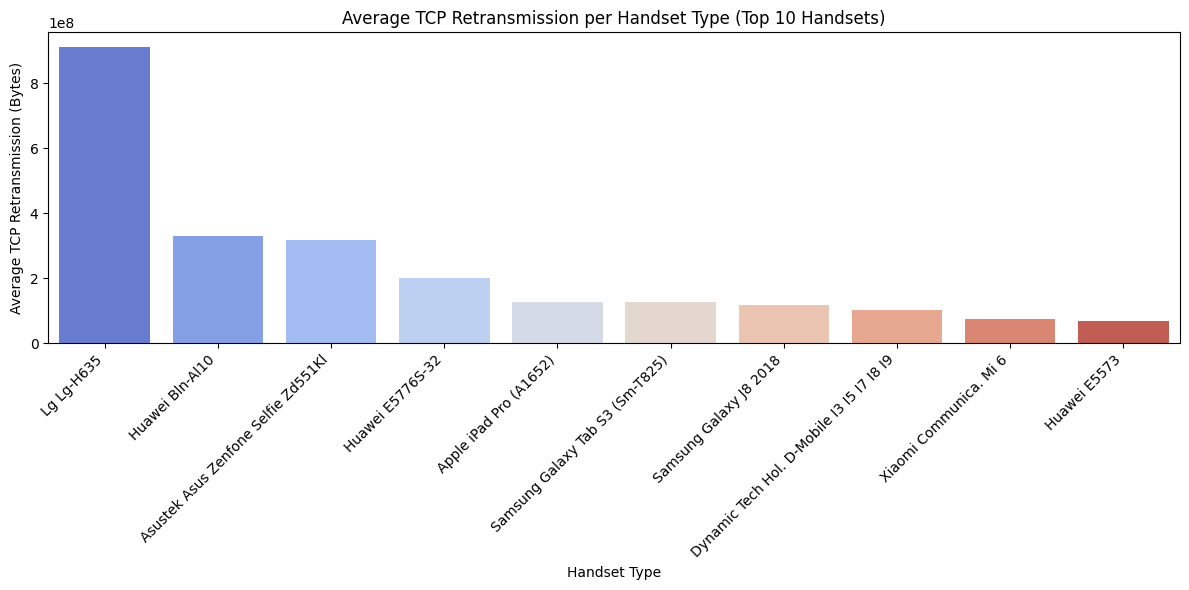

In [ ]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Throughput Distribution per Handset Type (showing top 10 handsets for clarity)
throughput_dist = user_experience.groupby('Handset Type')['Avg Throughput'].mean().sort_values(ascending=False).head(10)

# TCP Retransmission View per Handset Type (showing top 10 handsets for clarity)
tcp_dist = user_experience.groupby('Handset Type')['Avg TCP Retransmission'].mean().sort_values(ascending=False).head(10)

# Plotting Average Throughput per Handset Type (Top 10)
plt.figure(figsize=(12, 6))
sns.barplot(x=throughput_dist.index, y=throughput_dist.values, palette='viridis')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.title("Average Throughput per Handset Type (Top 10 Handsets)")
plt.xlabel("Handset Type")
plt.ylabel("Average Throughput (kbps)")
plt.tight_layout()  # Adjust layout to fit x-axis labels properly
plt.show()

# Plotting Average TCP Retransmission per Handset Type (Top 10)
plt.figure(figsize=(12, 6))
sns.barplot(x=tcp_dist.index, y=tcp_dist.values, palette='coolwarm')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.title("Average TCP Retransmission per Handset Type (Top 10 Handsets)")
plt.xlabel("Handset Type")
plt.ylabel("Average TCP Retransmission (Bytes)")
plt.tight_layout()  # Adjust layout to fit x-axis labels properly
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

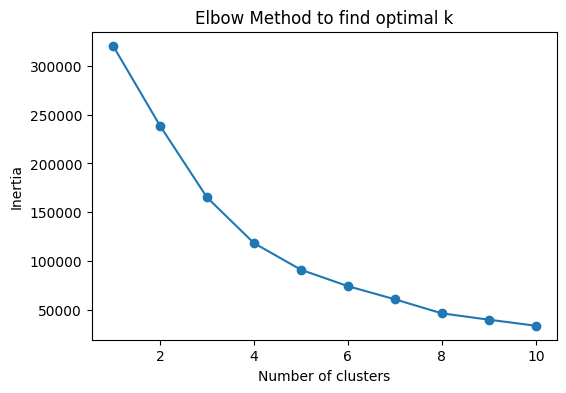

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


  Experience Cluster Avg TCP Retransmission                              \
                                        min           max          mean   
0                  0           2.000000e+00  1.068447e+09  1.627156e+07   
1                  1           1.131088e+09  4.289488e+09  2.224330e+09   
2                  2           3.100000e+01  1.118514e+09  1.948627e+07   

  Avg RTT                      Avg Throughput                          
      min      max        mean            min       max          mean  
0     0.0  96923.0  126.465593            0.0   28379.0   3751.278865  
1    31.0    507.0  104.547799        15243.0  141361.0  62838.408386  
2    15.0   5379.0   77.386355        25373.0  264448.0  48938.307379  


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Normalize data for k-means
scaler = StandardScaler()
experience_metrics = user_experience[['Avg TCP Retransmission', 'Avg RTT', 'Avg Throughput']]
experience_metrics_scaled = scaler.fit_transform(experience_metrics)

# Find optimal k using Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(experience_metrics_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method to find optimal k")
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Running k-means for k=3
kmeans = KMeans(n_clusters=3, random_state=0)
user_experience['Experience Cluster'] = kmeans.fit_predict(experience_metrics_scaled)

# Analyze each cluster
cluster_summary = user_experience.groupby('Experience Cluster').agg({
    'Avg TCP Retransmission': ['min', 'max', 'mean'],
    'Avg RTT': ['min', 'max', 'mean'],
    'Avg Throughput': ['min', 'max', 'mean']
}).reset_index()

print(cluster_summary)


**Interpretation:**

**Cluster 0**: Generally lower throughput and variable performance with a mix of low and high RTT and TCP retransmissions.

**Cluster 1**: High throughput and high TCP retransmissions with slightly worse latency, indicating consistent high performance but with network quality issues.

**Cluster 2**: Good throughput and low RTT with variable TCP retransmissions, suggesting generally good performance with some variability.